In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [102]:
train = pd.read_csv("data/train.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23011 entries, 0 to 23010
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   일시      23011 non-null  object 
 1   최고기온    23008 non-null  float64
 2   최저기온    23008 non-null  float64
 3   일교차     23007 non-null  float64
 4   강수량     9150 non-null   float64
 5   평균습도    23011 non-null  float64
 6   평균풍속    23007 non-null  float64
 7   일조합     22893 non-null  float64
 8   일사합     18149 non-null  float64
 9   일조율     22645 non-null  float64
 10  평균기온    23011 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.9+ MB


- 일사합: 일사량(태양의 복사 에너지가 땅에 닿는 양)의 합계
- 일조합 : 일사시간(구름이나 안개 따위에 가려지지 아니하고 햇볕이 실제로 내리쬐는 시간)의 합계
- 일조율 : 일조시간/가조시간
- 가조시간 :  태양의 중심이 지평선으로 올라와서 다시 지평선으로 질 때까지의 시간 길이

# EDA
## 1.  NA 값이 존재
- 최고, 최저기온 : 결측치들의 공통점이 보이지 않음 -> 데이터 누락값 -> 앞뒤의 값을 보고 보간 진행
- 강수량 : NA값을 모두 지우고 봤을 때 강수량이 0인 날이 꽤 많아보임 -> NA인 값은 강수량을 0으로 설정하는 게 좋을 것 같음
- 일교차 : 최고, 최저 기온이 없는 경우이므로 최고, 최저기온 보간 후 채워넣을 예정
- 평균풍속 : NA가 많지 않고, 결측치들의 공통점이 보이지 않음 -> 앞뒤의 값을 보고 보간 진행
- 일조합 : 동일하게 보간 진행
- 일사합 : 1960년부터 1972년, 1973년 2,3,4월까지 값이 없고, 그 이후에는 39개의 결측치가 있음 -> 너무 과거의 값이라서 제거하고 진행하거나 1973년 이전의 데이터를 제거하거나 0으로 설정하고, 그 이후의 데이터는 보간 진행
- 일조율 : 결측치가 전부 1960년에 있음 -> 데이터를 삭제해도 될 것 같음 -> 일조합으로 일조율을 추정하기에는 가조시간에 대한 정보가 없음

#### 일교차 및 최고, 최저 기온

In [103]:
train[train.일교차.isna()]

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
2606,1967-02-19,NaN,NaN,NaN,NaN,62.0,1.8,9.5,NaN,93.1,-1.7
5037,1973-10-16,NaN,NaN,NaN,0.4,74.0,1.8,3.5,9.24,29.7,12.3
21104,2017-10-12,NaN,8.8,NaN,NaN,71.0,2.0,NaN,2.23,0.0,11.4
22865,2022-08-08,28.4,NaN,NaN,129.6,91.6,3.3,NaN,NaN,0.0,26.8


#### 강수량

{'whiskers': [<matplotlib.lines.Line2D at 0x26463ffb820>,
 'caps': [<matplotlib.lines.Line2D at 0x26463ffbdc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26463ffb550>],
 'medians': [<matplotlib.lines.Line2D at 0x2646400a3a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2646400a670>],
 'means': []}

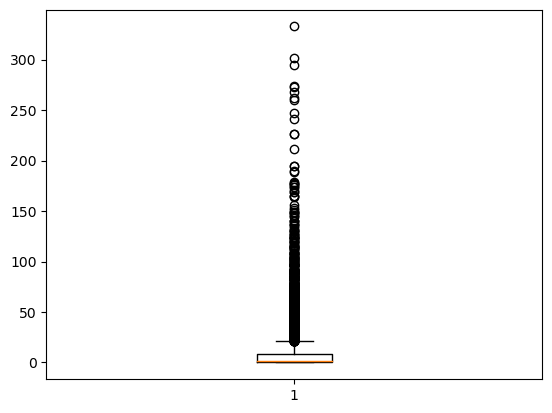

In [104]:
plt.boxplot(train.강수량.dropna())

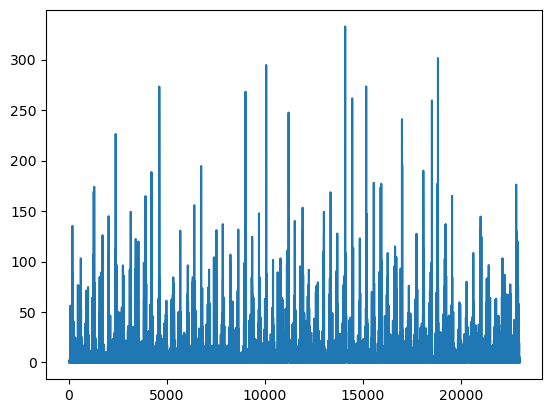

In [105]:
plt.plot(train.강수량.dropna())

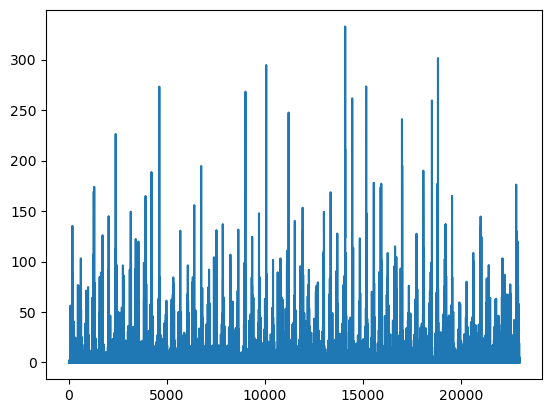

In [106]:
plt.plot(train.강수량.fillna(0))

#### 평균풍속

In [107]:
train[train.평균풍속.isna()]

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
8597,1983-07-16,26.5,21.3,5.2,3.9,79.5,NaN,2.2,8.02,15.2,24.2
21106,2017-10-14,20.5,9.0,11.5,NaN,42.8,NaN,10.6,10.58,93.8,14.4
21158,2017-12-05,-0.4,-8.2,7.8,0.1,40.1,NaN,2.1,0.86,21.6,-4.2
21159,2017-12-06,6.0,-4.5,10.5,1.2,72.6,NaN,7.7,6.14,79.4,0.2


{'whiskers': [<matplotlib.lines.Line2D at 0x26464076f10>,
 'caps': [<matplotlib.lines.Line2D at 0x264640864f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x26464076c10>],
 'medians': [<matplotlib.lines.Line2D at 0x26464086a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x26464086d60>],
 'means': []}

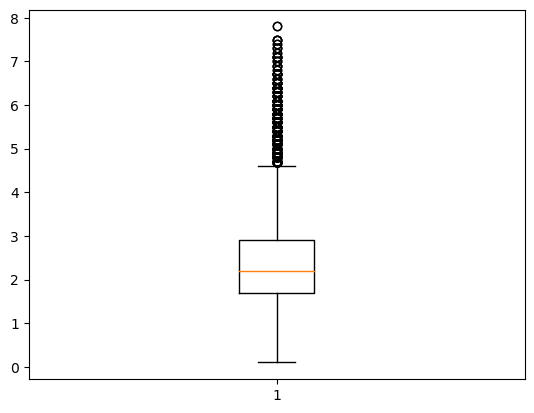

In [108]:
plt.boxplot(train.평균풍속.dropna())

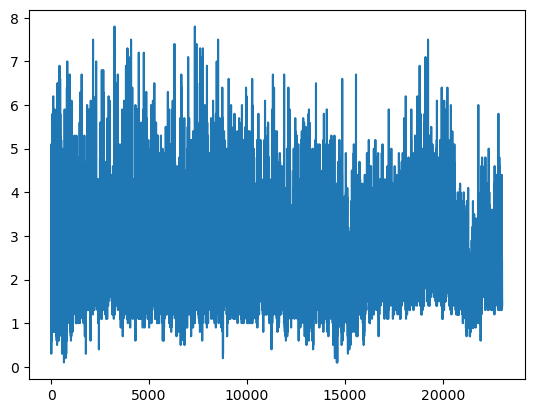

In [109]:
plt.plot(train.평균풍속.dropna())

#### 일조합

In [110]:
train[train.일조합.isna()]

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
1870,1965-02-13,5.4,0.4,5.0,1.6,81.0,2.8,NaN,NaN,0.0,2.1
1891,1965-03-06,0.2,-5.6,5.8,0.6,77.8,1.9,NaN,NaN,0.0,-2.6
1900,1965-03-15,11.4,0.8,10.6,10.5,88.0,3.3,NaN,NaN,0.0,5.2
1901,1965-03-16,3.4,0.3,3.1,3.3,89.8,2.2,NaN,NaN,0.0,1.6
1935,1965-04-19,10.0,6.8,3.2,2.5,78.8,3.5,NaN,NaN,0.0,8.5
...,...,...,...,...,...,...,...,...,...,...,...
21230,2018-02-15,4.0,-3.7,7.7,NaN,28.0,2.5,NaN,NaN,0.0,-0.7
21372,2018-07-07,29.2,19.5,9.7,NaN,51.4,1.6,NaN,27.32,0.0,23.7
21789,2019-08-28,30.2,23.6,6.6,NaN,66.2,1.9,NaN,NaN,0.0,26.1
22287,2021-01-07,-8.4,-16.5,8.1,NaN,49.9,4.1,NaN,NaN,0.0,-14.5


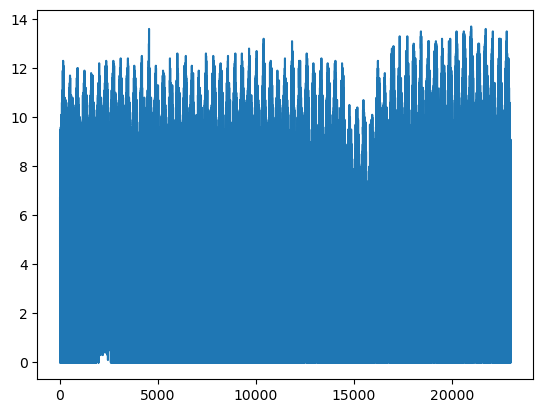

In [111]:
plt.plot(train.일조합.dropna())

#### 일사합

In [112]:
train[train.일사합.isna()]

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
21230,2018-02-15,4.0,-3.7,7.7,NaN,28.0,2.5,NaN,NaN,0.0,-0.7
21789,2019-08-28,30.2,23.6,6.6,NaN,66.2,1.9,NaN,NaN,0.0,26.1
21790,2019-08-29,26.4,20.1,6.3,36.9,77.1,2.2,4.9,NaN,37.4,23.4
22287,2021-01-07,-8.4,-16.5,8.1,NaN,49.9,4.1,NaN,NaN,0.0,-14.5


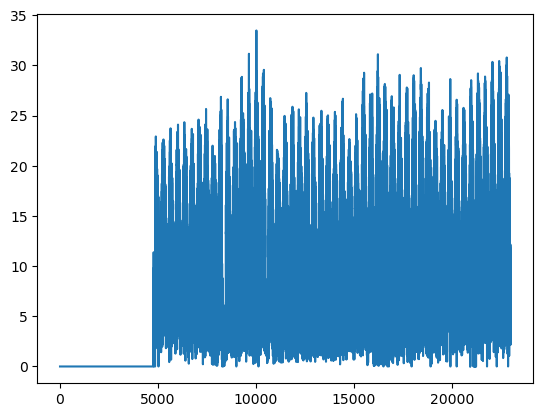

In [113]:
plt.plot(train.일사합.fillna(0))

In [114]:
train.iloc[0:4749]

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
4744,1972-12-27,5.0,0.0,5.0,NaN,92.8,1.3,0.0,NaN,0.0,2.3
4745,1972-12-28,3.3,-2.8,6.1,3.1,92.0,2.5,0.0,NaN,0.0,0.2
4746,1972-12-29,-2.8,-7.5,4.7,NaN,57.5,4.0,6.0,NaN,63.2,-6.0
4747,1972-12-30,-0.2,-8.0,7.8,0.0,69.3,1.3,3.0,NaN,31.6,-4.0


In [115]:
train.iloc[4780:4854]

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
4780,1973-02-01,6.4,-1.1,7.5,NaN,73.0,2.8,6.1,NaN,59.2,2.7
4781,1973-02-02,5.1,-3.5,8.6,NaN,53.5,1.5,5.6,NaN,53.8,0.5
4782,1973-02-03,4.8,1.3,3.5,1.0,76.5,1.8,0.0,NaN,0.0,2.4
4783,1973-02-04,11.4,-0.1,11.5,NaN,75.3,1.6,8.7,NaN,83.7,5.0
4784,1973-02-05,7.2,1.7,5.5,0.0,83.3,3.0,0.5,NaN,4.8,4.6
...,...,...,...,...,...,...,...,...,...,...,...
4849,1973-04-11,14.0,6.0,8.0,23.6,89.8,2.9,0.0,NaN,0.0,10.5
4850,1973-04-12,16.3,5.4,10.9,NaN,74.0,2.6,10.8,NaN,81.8,10.2
4851,1973-04-13,16.3,4.8,11.5,NaN,65.0,3.0,11.2,NaN,85.5,10.1
4852,1973-04-14,18.8,7.6,11.2,NaN,55.0,3.0,0.4,NaN,3.1,12.7


In [116]:
sum(train.iloc[4854:].일사합.isna())

39

#### 일조율

In [117]:
train[train.일조율.isna()]

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온
0,1960-01-01,2.2,-5.2,7.4,NaN,68.3,1.7,6.7,NaN,NaN,-1.6
1,1960-01-02,1.2,-5.6,6.8,0.4,87.7,1.3,0.0,NaN,NaN,-1.9
2,1960-01-03,8.7,-2.1,10.8,0.0,81.3,3.0,0.0,NaN,NaN,4.0
3,1960-01-04,10.8,1.2,9.6,0.0,79.7,4.4,2.6,NaN,NaN,7.5
4,1960-01-05,1.3,-8.2,9.5,NaN,44.0,5.1,8.2,NaN,NaN,-4.6
...,...,...,...,...,...,...,...,...,...,...,...
361,1960-12-27,-0.7,-9.4,8.7,0.0,61.3,1.8,0.0,NaN,NaN,-5.2
362,1960-12-28,-4.3,-9.8,5.5,NaN,53.0,3.7,4.3,NaN,NaN,-7.5
363,1960-12-29,-7.9,-13.5,5.6,NaN,49.3,5.0,9.0,NaN,NaN,-10.8
364,1960-12-30,-9.7,-16.0,6.3,NaN,53.3,5.7,8.2,NaN,NaN,-12.8


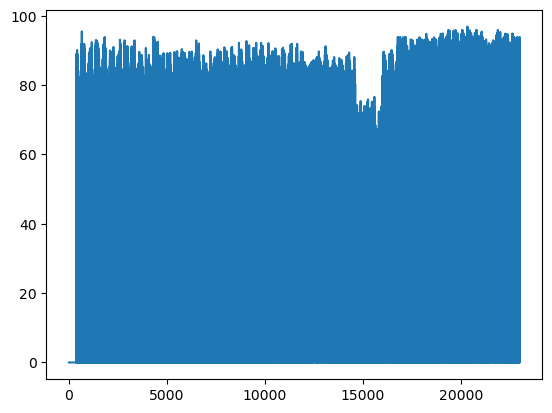

In [118]:
plt.plot(train.일조율.fillna(0))

## 2. 이상치 제거 및 결측치 보간

#### 강수량

In [119]:
# 이상치 판단
def outlier(data, column):
    q25 = np.quantile(data[column].dropna(), 0.25)
    q75 = np.quantile(data[column].dropna(), 0.75)
    iqr = q75 - q25
    iqr_cut = iqr * 3
    result = data[(data[column] > q75 + iqr_cut) | (data[column] < q25 - iqr_cut)].index
    return result

<BarContainer object of 771 artists>

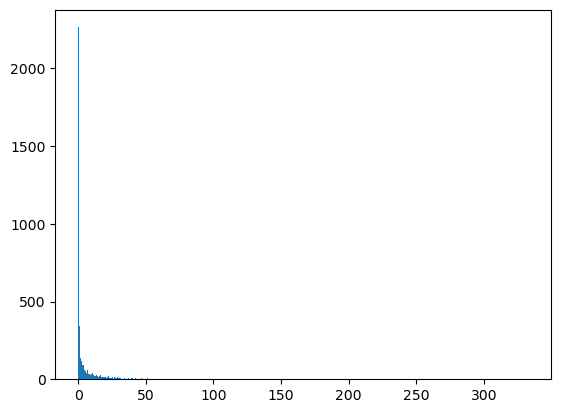

In [120]:
# 그래프가 정규분포를 너무 따르지 않음 -> 강수량이 0인 날을 제외해도 그래프가 정규분포를 따르기는 어려워보임 => 이상치 판단이 어려움
plt.bar(train.강수량.value_counts().index, train.강수량.value_counts().values)

<BarContainer object of 477 artists>

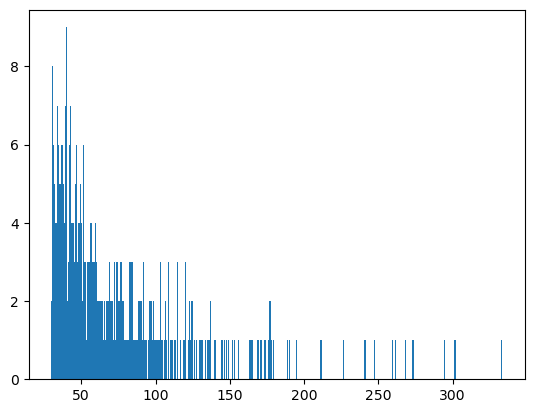

In [121]:
plt.bar(train[train.강수량>30].강수량.value_counts().index, train[train.강수량>30].강수량.value_counts().values)

In [122]:
# 강수량은 기상청에서 정한 강수표현에 따라 구간을 나누는 것으로 수치 변경
# 비가 내리지 않음 : 0, 매우 약한 비 : 0~1, 약한 비 : 1~3, 보통 비 : 3~15, 강한 비 : 15~30, 매우 강한 비 : 30 이상
train.강수량 = pd.cut(train.강수량, bins = [0, 0.9, 2.9, 14.9, 29.9, max(train.강수량)], labels = [1, 2, 3, 4, 5])
train.강수량 = train.강수량.astype('float')
train.강수량 = train.강수량.fillna(0)

#### 최고, 최저 기온, 평균풍속, 일조합

In [123]:
def time_interpolate(data, column):
    tem = data[["일시", column]].copy()
    tem.index = pd.to_datetime(tem['일시'])
    tem = tem.drop(["일시"], axis = 1)
    tem = tem.interpolate(method="time")
    return tem[column].values

train.최고기온 = time_interpolate(train, "최고기온")
train.최저기온 = time_interpolate(train, "최저기온")

In [124]:
# 최저기온, 최고기온 모두 이상치 없음
outlier(train, "최고기온")

Index([], dtype='int64')

In [125]:
outlier(train, "최저기온")

Index([], dtype='int64')

#### 일교차

In [126]:
train.일교차 = train.최고기온 - train.최저기온

In [127]:
outlier(train, "일교차")

Index([], dtype='int64')

<BarContainer object of 611 artists>

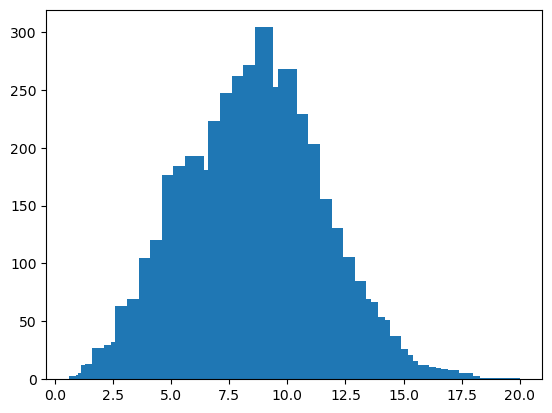

In [128]:
plt.bar(train.일교차.value_counts().index, train.일교차.value_counts().values)

#### 평균풍속

In [129]:
train.평균풍속 = time_interpolate(train, "평균풍속")

In [130]:
outlier(train, "평균풍속")

Index([  427,   459,   823,   950,  1557,  2138,  2297,  2584,  2661,  3235,
        3401,  3818,  3894,  3966,  4078,  4473,  4729,  6292,  6643,  6992,
        7334,  7414,  7604,  7651,  7726,  7727,  7744,  7952,  8449,  8516,
        8519,  9059, 10259, 11317, 11890, 14854, 15557, 18804, 19104, 19233],
      dtype='int64')

<BarContainer object of 80 artists>

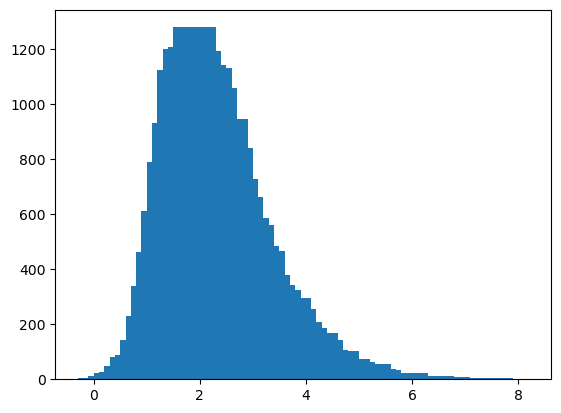

In [131]:
plt.bar(train.평균풍속.value_counts().index, train.평균풍속.value_counts().values)

{'whiskers': [<matplotlib.lines.Line2D at 0x2647345cfa0>,
 'caps': [<matplotlib.lines.Line2D at 0x2647346b580>,
 'boxes': [<matplotlib.lines.Line2D at 0x2647345cc70>],
 'medians': [<matplotlib.lines.Line2D at 0x2647346bb20>],
 'fliers': [<matplotlib.lines.Line2D at 0x2647346bdf0>],
 'means': []}

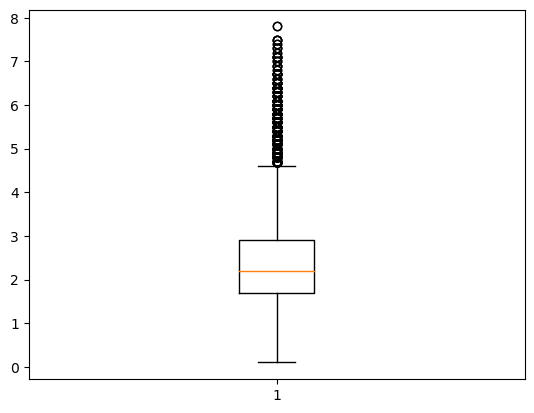

In [132]:
plt.boxplot(train.평균풍속)

In [133]:
# 이상치가 좀 있으므로 전부 NA로 바꾸고 보간을 해준다.
train.loc[outlier(train, "평균풍속"),"평균풍속"] = np.nan

In [134]:
train.평균풍속 = time_interpolate(train, "평균풍속")

In [135]:
outlier(train, "평균풍속")

Index([], dtype='int64')

#### 일조합

In [136]:
train.일조합 = time_interpolate(train, "일조합")

In [137]:
outlier(train, "일조합")

Index([], dtype='int64')

<BarContainer object of 221 artists>

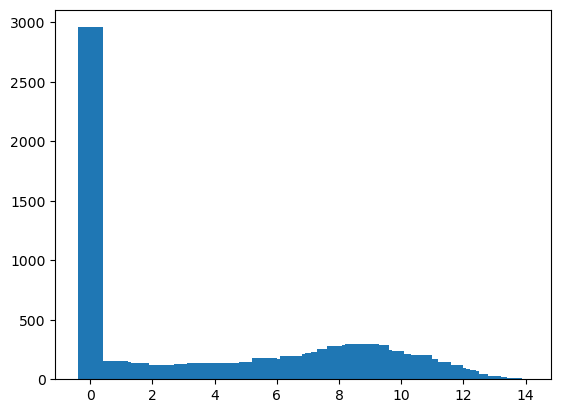

In [138]:
plt.bar(train.일조합.value_counts().index, train.일조합.value_counts().values)

{'whiskers': [<matplotlib.lines.Line2D at 0x264738f8ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x264737872b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x264738f8af0>],
 'medians': [<matplotlib.lines.Line2D at 0x26473787850>],
 'fliers': [<matplotlib.lines.Line2D at 0x26473787b20>],
 'means': []}

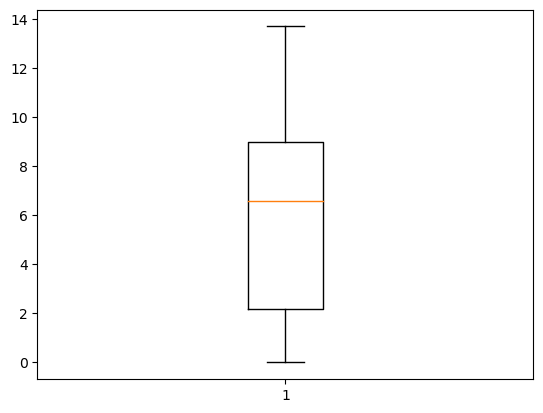

In [139]:
plt.boxplot(train.일조합)

#### 일사합

In [140]:
train.loc[0:4749, "일사합"] = 0

In [141]:
train.loc[4780:4854, "일사합"] = 0

In [142]:
train.일사합.isna().sum()

39

In [143]:
train.일사합 = time_interpolate(train, "일사합")

In [144]:
outlier(train, "일사합")

Index([], dtype='int64')

#### 일조율

In [145]:
# 삭제
train = train.iloc[train.일조율.dropna().index]

In [146]:
outlier(train, "일조율")

Index([], dtype='int64')

In [147]:
# 이상치 없음, 결측치 없음
train.isna().sum()

일시      0
최고기온    0
최저기온    0
일교차     0
강수량     0
평균습도    0
평균풍속    0
일조합     0
일사합     0
일조율     0
평균기온    0
dtype: int64

### 변수 생성
1. 가조합 : 일조합/일조율
2. 일사합/일조합 : 햇빛이 실제 내리쬐는 시간 중 진짜 에너지가 닿는 비율
3. 사절기
4. 년, 월, 일

In [148]:
# 가조합
train["가조합"] = train.일조합/(train.일조율/100)
train.가조합 = time_interpolate(train, "가조합")

In [152]:
# 일사합/일조합
train["일사_일조"] = train.일사합/train.일조합
train.일사_일조 = time_interpolate(train, "일사_일조")

In [176]:
# 년, 월, 일
train["연"] = train.일시.str.split("-", expand = True)[0].astype("int")
train["월"] = train.일시.str.split("-", expand = True)[1].astype("int")
train["일"] = train.일시.str.split("-", expand = True)[2].astype("int")

In [193]:
# 사계절: 0 겨울, 1 봄, 2 여름, 3 가을
train["계절"] = pd.cut(train.월, bins = [0, 2, 5, 8, 11, 12], labels = [0, 1, 2, 3, 5])
train.계절 = [0 if i == 5 else i for i in train.계절]
train.계절 = train.계절.astype("int")

## 시각화 및 EDA

In [204]:
# 1961년 ~ 2022년까지 총 62년 데이터
len(set(train.연))

62

Text(0.5, 1.0, '계절별 연평균 최저, 최고, 평균 기온 및 일교차')

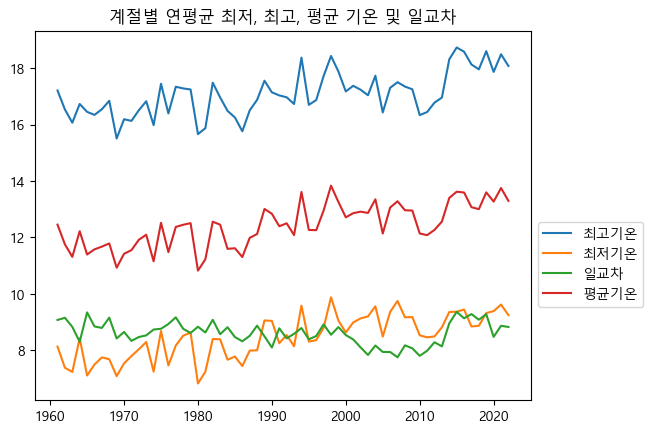

In [225]:
# 한글 폰트 깨짐 해결
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

# 연도별 평균 기온
plt.plot(train[["연", "최고기온", "최저기온", "일교차", "평균기온"]].groupby("연").mean(), label =["최고기온","최저기온","일교차","평균기온"])
plt.legend( bbox_to_anchor=(1, 0.5))
plt.title("계절별 연평균 최저, 최고, 평균 기온 및 일교차")

- 연도별 평균 기온 : 전체적으로 들쑥날쑥한 모양을 보이고 있다. 그리고 시간이 지남에 따라 최고, 최저, 평균 기온은 올라가고 있다.

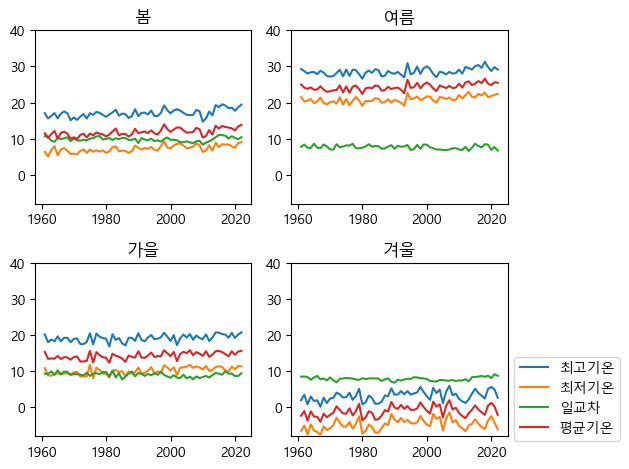

In [238]:
plt.title("계절별 연평균 최저, 최고, 평균 기온 및 일교차")

plt.subplot(2, 2, 1)
plt.plot(train[["연", "최고기온", "최저기온", "일교차", "평균기온"]][train.계절 == 1].groupby("연").mean(), label =["최고기온","최저기온","일교차","평균기온"])
plt.title("봄")
plt.ylim(-8, 40)

plt.subplot(2, 2, 2)
plt.plot(train[["연", "최고기온", "최저기온", "일교차", "평균기온"]][train.계절 == 2].groupby("연").mean(), label =["최고기온","최저기온","일교차","평균기온"])
plt.title("여름")
plt.ylim(-8, 40)

plt.subplot(2, 2, 3)
plt.plot(train[["연", "최고기온", "최저기온", "일교차", "평균기온"]][train.계절 == 3].groupby("연").mean(), label =["최고기온","최저기온","일교차","평균기온"])
plt.title("가을")
plt.ylim(-8, 40)

plt.subplot(2, 2, 4)
plt.plot(train[["연", "최고기온", "최저기온", "일교차", "평균기온"]][train.계절 == 0].groupby("연").mean(), label =["최고기온","최저기온","일교차","평균기온"])
plt.legend(bbox_to_anchor=(1, 0.5))
plt.title("겨울")
plt.ylim(-8, 40)

plt.tight_layout()
plt.show()

- 최고, 최저, 평균 기온은 거의 비슷한 모양을 나타낸다.
- 일교차가 두드러지게 있을 줄 알았는데 일교차의 차이가 거의 없는 모습이다. -> 평균을 내서 큰 차이는 없는 것 같지만 차이를 굳이 따지자면 봄이 가장 일교차가 커보인다.
- 봄과 가을이 온도가 비슷해보인다. 굳이 따지자면 가을이 더 온도가 높다.

In [239]:
train

,일시,최고기온,최저기온,일교차,강수량,평균습도,평균풍속,일조합,일사합,일조율,평균기온,가조합,일사_일조,연,월,일,계절
366,1961-01-01,-4.9,-15.0,10.1,0.0,73.8,0.8,2.7,0.00,28.1,-9.8,9.608541,0.000000,1961,1,1,0
367,1961-01-02,0.2,-12.3,12.5,0.0,72.3,1.4,4.9,0.00,51.0,-6.2,9.607843,0.000000,1961,1,2,0
368,1961-01-03,0.3,-4.7,5.0,3.0,77.0,2.6,0.0,0.00,0.0,-1.1,9.653806,0.000000,1961,1,3,0
369,1961-01-04,-4.7,-13.7,9.0,0.0,46.0,2.9,8.4,0.00,86.6,-9.5,9.699769,0.000000,1961,1,4,0
370,1961-01-05,-6.2,-16.5,10.3,0.0,54.3,0.9,6.2,0.00,63.9,-10.8,9.702660,0.000000,1961,1,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23006,2022-12-27,3.3,-7.3,10.6,0.0,69.8,1.8,8.8,10.25,91.7,-2.6,9.596510,1.164773,2022,12,27,0
23007,2022-12-28,0.1,-6.0,6.1,1.0,58.1,2.5,8.7,10.86,90.6,-3.3,9.602649,1.248276,2022,12,28,0
23008,2022-12-29,2.1,-7.8,9.9,0.0,56.3,1.7,9.0,10.88,93.8,-2.9,9.594883,1.208889,2022,12,29,0
23009,2022-12-30,2.3,-4.4,6.7,0.0,65.6,1.9,7.9,10.84,82.3,-1.8,9.599028,1.372152,2022,12,30,0
